# CURSO ESTATÍSTICA NO PYTHON
## Análise de dados Financeiros
### Responsável: Danilo Alcântara  Milhomem
### Data: 19/01/2020
### Mestrado em Engenharia de Produção e Sistemas - MEPROS - PUC Goiás
### Otimização de portfólio
### Orientador (a): Dra. Maria José Pereira Dantas
 

## 1. IMPORTAR BIBLIOTECAS 

In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import datetime
sns.set_style('whitegrid')
%matplotlib inline 
#Este ultimo recurso é específico para usuários do jupyter Notebook. Ele facilita a plotagem de 
# gráficos do matplotlib logo abaixo das células de código e o armazenamento  delas no documento
# do notebook.


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## 2. BAIXAR O PREÇO DOS ATIVOS DO SITE YAHOO FINANCE:

In [1]:
# INSERIR OS TICKERS DOS ATIVOS QUE SE DESEJAS ANALISAR

ativos = ["RADL3.SA", "SBSP3.SA", "WEGE3.SA", "CGAS5.SA"]

teste = []
#['WEGE3.SA', 'PRIO3.SA', 'VVAR3.SA', 'MRFG3.SA', 'BPAC3.SA', 'SUZB3.SA']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2020, 5, 22)
# DEFNIR A VARIAVEL, QUE RECBERÁ O PREÇO DOS ATIVOS COMO UM DATAFRAME:

pf_data = pd.DataFrame(columns= ativos) 

NameError: ignored

In [0]:
for a in ativos:
  pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start= start, end= end)['Adj Close']

## 3.  VISUALIZAR OS DADOS: O INICIO E FINAL DO DATAFRAME E INFORMAÇÕES GERAIS SOBRE O CONJUNTO DE DADOS

In [2]:
# INICIO: 5 PRIMEIRAS LINHAS
pf_data.head() # PODEMOS ADICIONAR NUMEROS ENTRE OS PARENTESES SE DESEJARMOS OBSERVAR UMA QUANTIDADE MAIOR DE DADOS

NameError: ignored

In [0]:
# FINAL: 5 ULTIMAS LINHAS
pf_data.tail(100)

,RADL3.SA,SBSP3.SA,WEGE3.SA,CGAS5.SA
Date,,,,
2019-12-23,108.154762,58.066509,33.644718,131.659470
2019-12-26,109.542137,59.594833,34.700157,138.969498
2019-12-27,109.711815,59.807636,35.188053,139.473969
2019-12-30,111.428551,58.579178,34.510975,140.918167
2020-01-02,114.612511,58.569500,35.088482,141.056671
...,...,...,...,...
2020-05-18,105.930000,41.000000,36.619999,161.970001
2020-05-19,103.019997,40.299999,36.919998,159.080002
2020-05-20,102.949997,39.320000,37.639999,160.419998


In [0]:
# INFORMAÇÕES GERAIS SOBRE O CONJUNTO DE DADOS:
pf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 343 entries, 2019-01-02 to 2020-05-22
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RADL3.SA  343 non-null    float64
 1   SBSP3.SA  343 non-null    float64
 2   WEGE3.SA  343 non-null    float64
 3   CGAS5.SA  342 non-null    float64
dtypes: float64(4)
memory usage: 13.4 KB


## 4. VERIFICAR DADOS FALTANTES E RETIRAR AS CÉLULAS QUE OS CONTEM:

In [0]:
# VERIFICAR EM QUAIS COLUNAS E EM QUE QUANTIDADE ESTÃO PRESENTES OS DADOS FALTANTES:
pf_data.isnull().sum()


RADL3.SA    0
SBSP3.SA    0
WEGE3.SA    0
CGAS5.SA    1
dtype: int64

In [0]:
# RETIRAR DADOS FALTANTES DO CONJUNTO DE DADOS:


pf_data = pf_data.dropna(subset=[ativos[5], ativos[8], ativos[13], ativos[35], ativos[36], ativos[38], ativos[49]])

IndexError: ignored

In [0]:
# CONFERIR SE OS DADOS FORAM RETIRADOS:
A = pf_data.isnull().sum()
for i in A:
  print(i)

0
0
0
1


In [0]:
# VERIFICAR NOVAMENTE A QUANTIDADE DE DADOS EM CADA COLUNA DO DATAFRAME:
pf_data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 343 entries, 2019-01-02 to 2020-05-22
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RADL3.SA  343 non-null    float64
 1   SBSP3.SA  343 non-null    float64
 2   WEGE3.SA  343 non-null    float64
 3   CGAS5.SA  342 non-null    float64
dtypes: float64(4)
memory usage: 13.4 KB


## 5. ANÁLISE ESTATÍSTICA DOS DADOS:

In [0]:
# ESTATÍSTICA DESCRITIVA DO CONJUNTO DE DADOS:
pf_data.describe()

,RADL3.SA,SBSP3.SA,WEGE3.SA,CGAS5.SA
count,316.000000,316.000000,316.000000,316.000000
mean,88.474990,47.416084,25.740382,100.877991
std,21.321394,7.979321,8.250607,48.997241
min,55.550953,29.550756,17.225552,51.511112
25%,67.064178,39.785059,18.702918,70.892921
50%,89.605453,47.909950,22.842147,75.501270
75%,108.042757,52.988230,31.932413,119.629454
max,128.346451,64.295868,49.585880,243.040817


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c52d91550>,
      dtype=object)

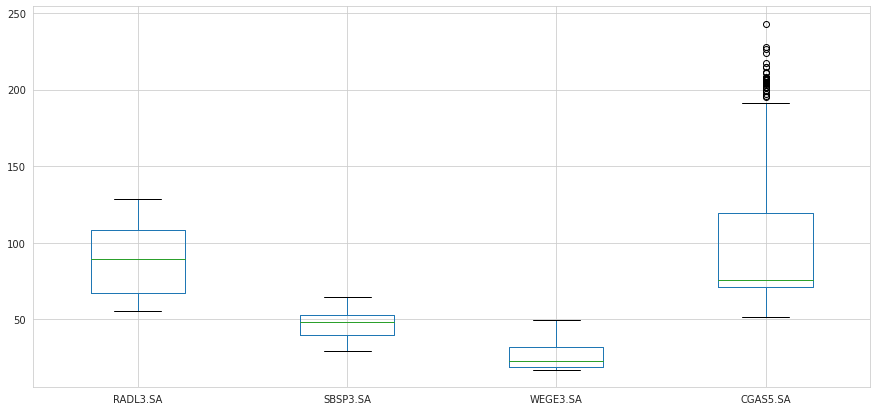

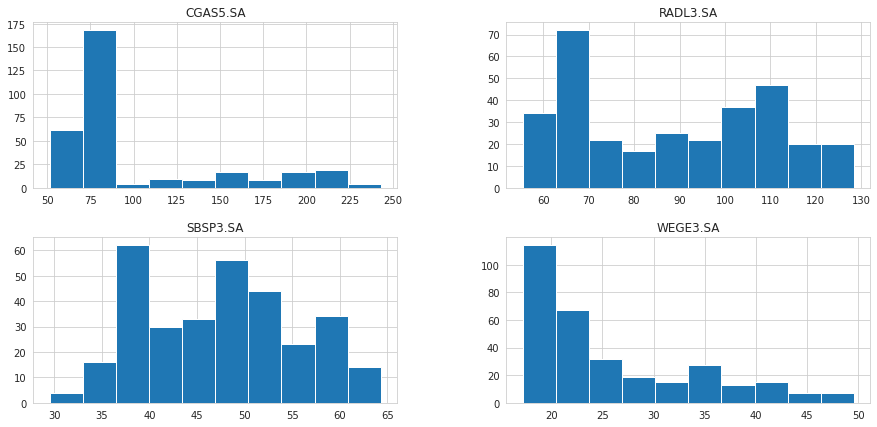

In [0]:
# GRÁFICO BOX-PLOT:
'''
Com esse gráfico é possível verificar o comportamento do conjunto de ações, por exemplo:
1º A dispersão é representada pela amplitude do gráfico, que pode ser calculada como máximo valor – mínimo valor. 
Quanto maior for a amplitude, maior a variação nos dados.
2º a presênça de outliers é uma forte indicação de que o ativo é extremamente sensível a mudanças (politica, social, climatica, fiscal).

Dependendo da estratégia do investidor, ações que apresentam um determinado comportamento (baixa ou alta volatilidade) nos dados podem ser 
escolhidas em detrimento de outras, por exemplo:
Ações muito voláteis são preferidas por investidos de curto prazo (" ideia de mineração de riqueza"), e ações menos voláteis são preferidas por investidores
de longo prazo ("ideia de ser sócio de um determinado negócio, sentimento de dono").
'''

pf_data.boxplot(figsize= (15, 7))
pf_data.hist(figsize= (15, 7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c51312860>,
      dtype=object)

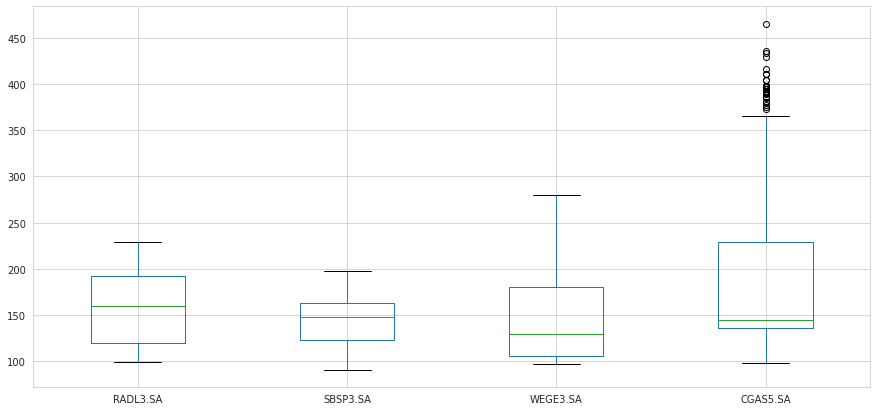

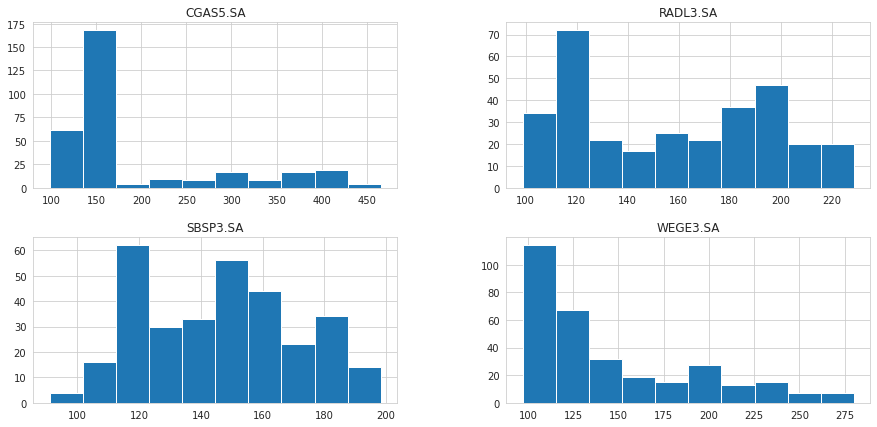

In [0]:
# Para realizar uma comparação justa é ecessário normalizar os dados, pois cada ativos possui uma precificação
# que é inerente ao seu setor e que difere dos demais ativos. Portanto, vamos trazer todos os dados para a base 100
data = (pf_data/pf_data.iloc[0] * 100) #.plot(figsize=(20,10))

data.boxplot(figsize= (15, 7));
data.hist(figsize= (15, 7))

In [0]:
# MATRIZ DE COVARIANCIA
'''
Com essa matriz podemos verificar tanto a força como a direção da relação linear entre duas variáveis.
Entretanto, é dificil fazer julgamento sobre o poder da relação entre duas variveis usando o covariancia, porque essa medida
não é padronizada.
'''
pf_data.cov()

,RADL3.SA,SBSP3.SA,WEGE3.SA,CGAS5.SA
RADL3.SA,454.601846,129.837166,156.109538,802.007750
SBSP3.SA,129.837166,63.669565,44.435460,210.464521
WEGE3.SA,156.109538,44.435460,68.072509,372.783093
CGAS5.SA,802.007750,210.464521,372.783093,2400.729630


In [0]:
pf_data.var()

RADL3.SA     454.601846
SBSP3.SA      63.669565
WEGE3.SA      68.072509
CGAS5.SA    2400.729630
dtype: float64

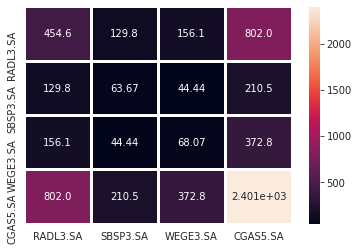

In [0]:
#  Crie um mapa de calor da covariância entre os preços de fechamento ajustado das ações. 
sns.heatmap(pf_data.cov(), annot=True, linewidths=2 , fmt='.4');

In [0]:
# MATRIZ DE CORRELAÇÃO:
'''
Com essa matriz podemos verificar tanto a força como a direção da relação linear entre duas variáveis. A correlação é uma medida padronizada entre [-1, 1].
corr = 1: correlação perfeitamente positiva, ou seja, se um dos ativos sofre aumento em seu preço, o outro também apresenta alta no preço.  
Corr = -1: correlação perfeitamente negativa, ou seja, se o preço de um ativo sofre uma alta, o preço do outro ativo desce.

Essa informação é importante tanto para conhecer o comportamento de um conjunto de ativos do mesmo setor ou de setores diferentes,
 quanto para quem deseja diversificar seus investimentos. Para diversificar os investimentos (construir uma carteira de ações) e obter bons resultados
 é necessários incluir ações que tenham comportamentos diferentes de forma que, de maneira geral, o resultado da carteira seja positivo, 
 indepentmente da baixa no preços de alguns ativos. O modelo de Markowitz pode ser usado para construir uma carteira diversificada 
 levando em consideração (dentre outras variáveis) a correlação entre os ativos.
'''
pf_data.corr()

,RADL3.SA,SBSP3.SA,WEGE3.SA,CGAS5.SA
RADL3.SA,1.000000,0.763163,0.887417,0.767700
SBSP3.SA,0.763163,1.000000,0.674960,0.538321
WEGE3.SA,0.887417,0.674960,1.000000,0.922144
CGAS5.SA,0.767700,0.538321,0.922144,1.000000


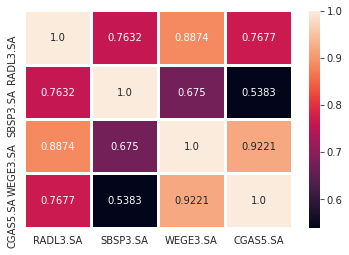

In [0]:
#  Crie um mapa de calor da correlação entre os preços de fechamento ajustado das ações. 
sns.heatmap(pf_data.corr(), annot=True, linewidths=2 , fmt='.4');

In [0]:
# CALCULAR O VALOR MEDIO DO PREÇO DE CADA AÇÃO:
'''
É comum a inserção de médias nas análises do preço de ativos, mas, há autores que defendem o uso de medidas
"robustas", e a mediana é uma delas. Ela é considerada robusta por que não sofre tanto impacto da volatilidade quanto a média.
'''
media = pf_data.mean()
print("Média", '\n', media)
mediana = pf_data.median()
print('\n', "Mediana", '\n', mediana)

Média 
 RADL3.SA     88.474990
SBSP3.SA     47.416084
WEGE3.SA     25.740382
CGAS5.SA    100.877991
dtype: float64

 Mediana 
 RADL3.SA    89.605453
SBSP3.SA    47.909950
WEGE3.SA    22.842147
CGAS5.SA    75.501270
dtype: float64


Médias móveis:

Vamos analisar as médias móveis para essas ações no ano de 2010.
** Trace a média de 30 dias para o preço próximo de cada ativo para o ano de 2010 **

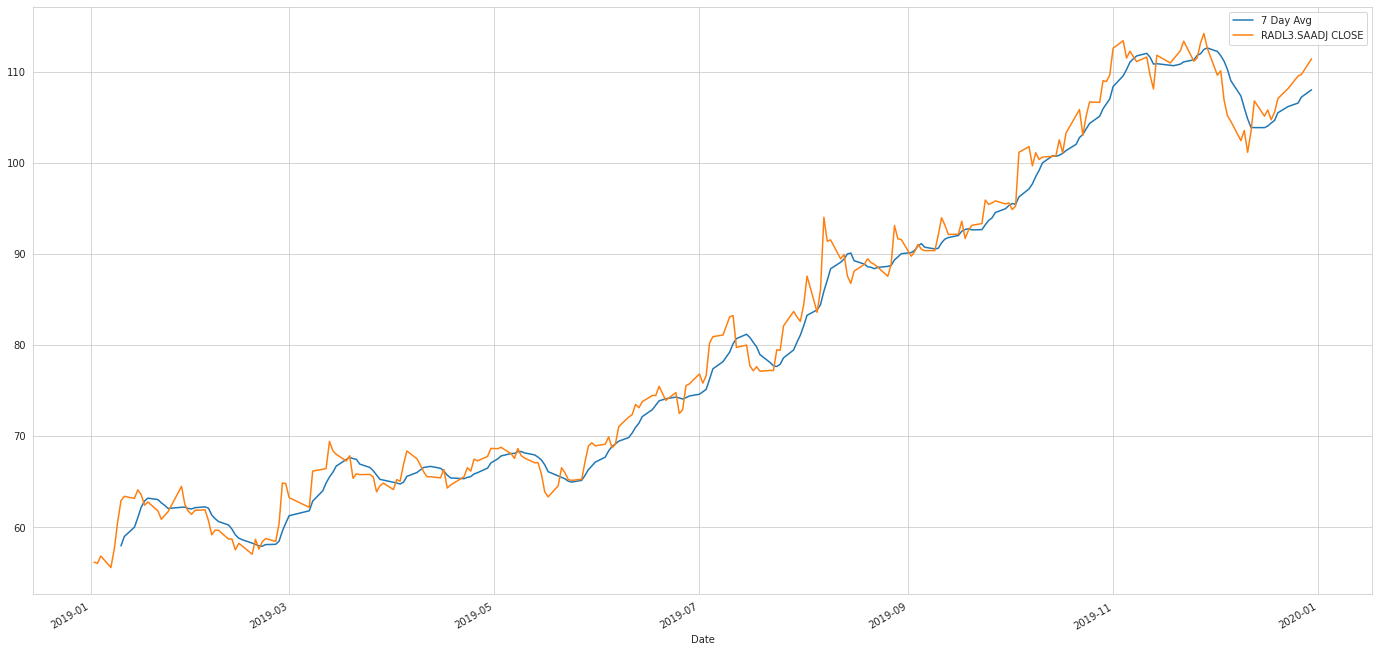

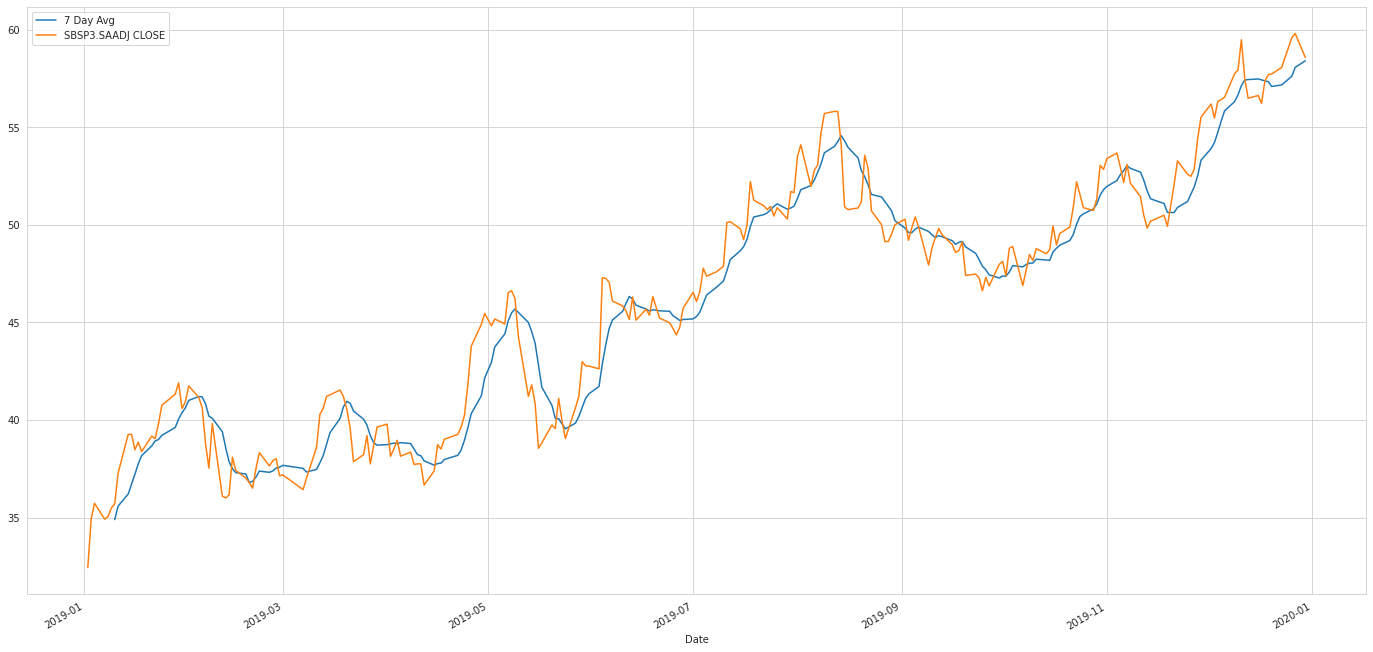

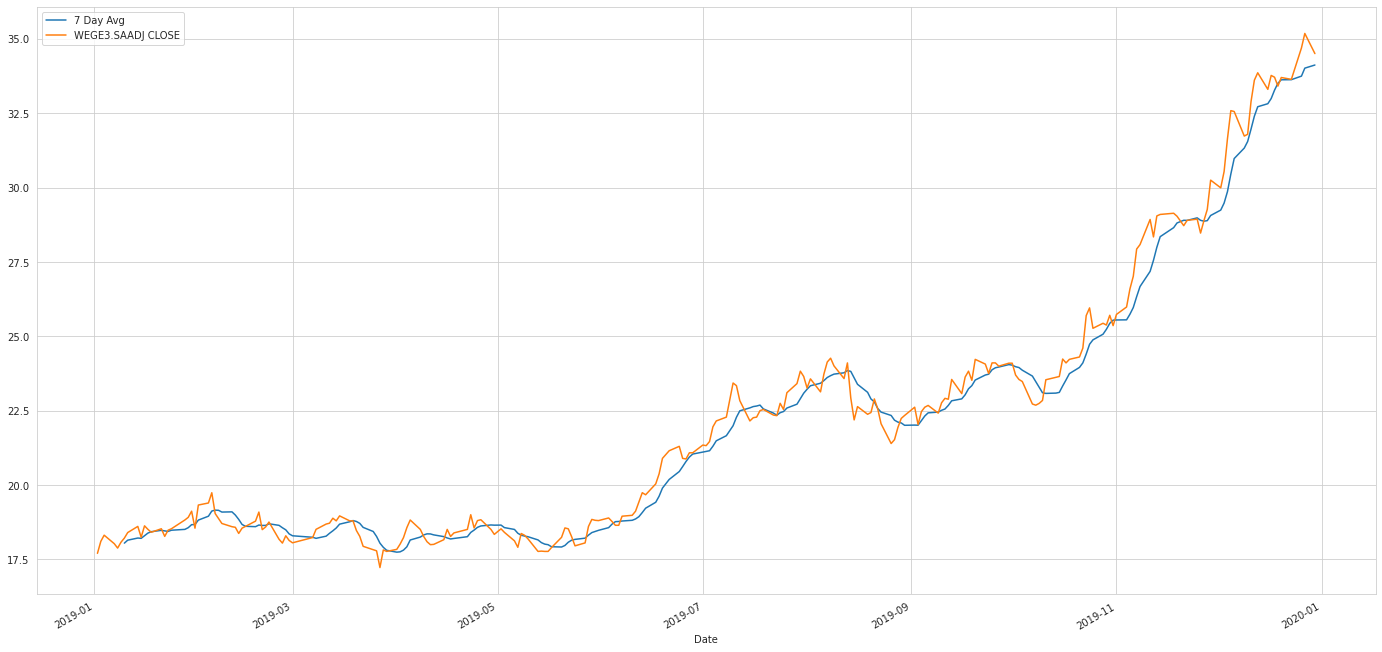

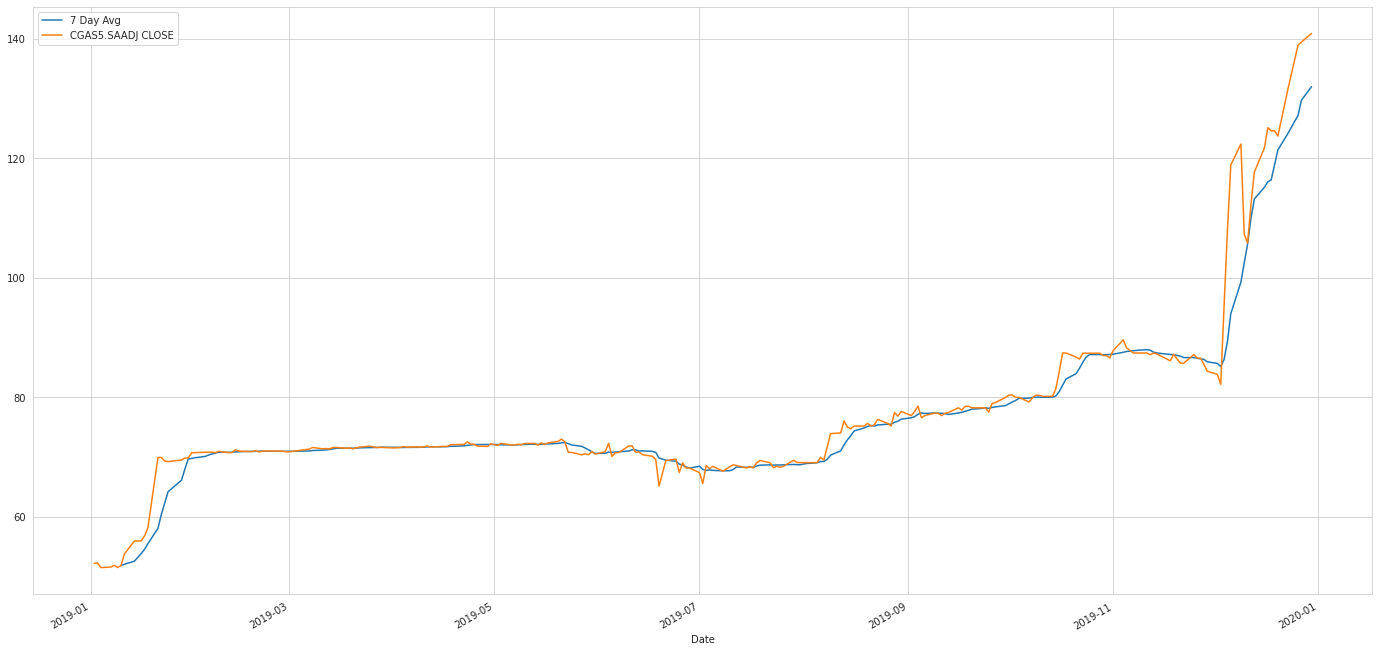

In [0]:
for i in range(len(ativos)):
  plt.figure(figsize=(24,12))
  pf_data[ativos[i]].loc['2019-01-01':'2020-01-01'].rolling(window=7).mean().plot(label='7 Day Avg')
  pf_data[ativos[i]].loc['2019-01-01':'2020-01-01'].plot(label= str(ativos[i] + 'ADJ CLOSE'))
  plt.legend()

In [0]:
import datetime
tickers = ['PETR4.SA']
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2020, 2, 4)
PTR4 = wb.DataReader("PETR4.SA", 'yahoo', start, end)
# podemos baixar tabém usando:
#EQTL3 = wb.DataReader(['EQTL3.SA'],'yahoo', start, end)
#EQTL3 = pd.concat([EQTL3],axis=1 #,keys=tickers)
PTR4

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,24.570000,23.200001,23.270000,24.540001,17321600.0,20.076136
2009-01-05,25.500000,24.030001,24.379999,25.100000,26454800.0,20.534271
2009-01-06,25.889999,25.059999,25.510000,25.450001,24252200.0,20.820604
2009-01-07,24.990000,24.129999,24.799999,24.450001,20606100.0,20.002504
2009-01-08,25.500000,23.840000,24.350000,25.500000,23999000.0,20.861507
...,...,...,...,...,...,...
2020-01-29,29.080000,28.670000,29.000000,28.850000,42297500.0,28.848438
2020-01-30,29.040001,28.180000,28.280001,28.940001,44266800.0,28.938435
2020-01-31,28.840000,28.309999,28.629999,28.450001,55446700.0,28.448462


In [0]:
from google.colab import files
# TRANSFORMA O DATAFRAME EM UM ARQUIVO EXCEL E REALIZA O DOWNLOAD:
PTR4_csv = PTR4.to_csv('PTR4.csv')



In [0]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('PTR4.csv')


fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

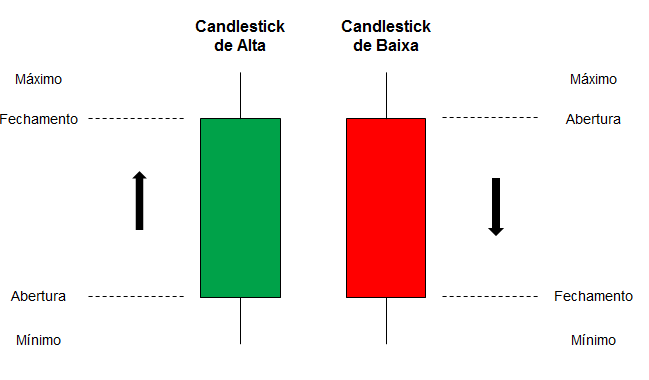

In [0]:
# VERIFICAR O DIA EM QUE O PREÇO DA AÇÃO FOI O MENOR E O MAIOR
'''
Essa estratégia pode ser usada por invstidores que procuram entender o porque o 
preço de uma determinada ação caiu ou subiu, procurando por meio das data, acontecimentos
climaticos, politicos, culturais, sociais...
'''
menor_preco = pf_data.idxmin()
print("Data do menor preço histórico", '\n', menor_preco)

maior_preco = pf_data.idxmax()
print('\n', "Data do maior preço histórico", '\n', maior_preco)

Data do menor preço histórico 
 RADL3.SA   2019-01-07
SBSP3.SA   2020-03-23
WEGE3.SA   2019-03-27
CGAS5.SA   2019-01-04
dtype: datetime64[ns]

 Data do maior preço histórico 
 RADL3.SA   2020-01-29
SBSP3.SA   2020-02-19
WEGE3.SA   2020-02-21
CGAS5.SA   2020-01-14
dtype: datetime64[ns]


## 6. COMPARAR A PERFORMANCE DA EVOLUÇÃO DOS PREÇOS DOS ATIVOS:

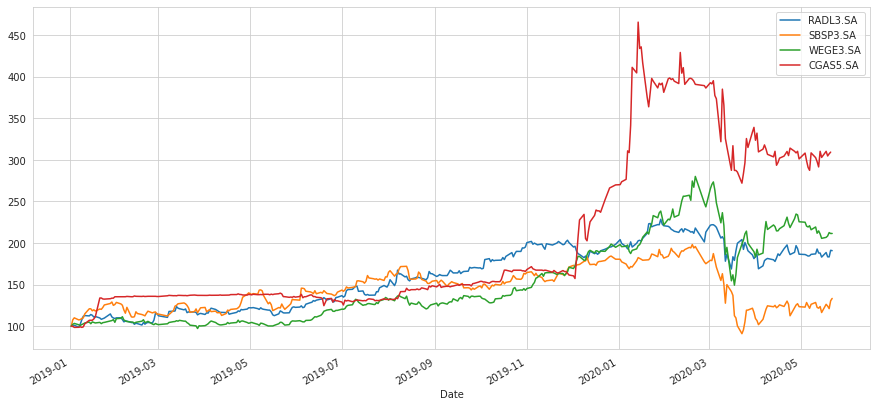

In [0]:
# Para realizar uma comparação justa é ecessário normalizar os dados, pois cada ativos possui uma precificação
# que é inerente ao seu setor e que difere dos demais ativos. Portanto, vamos trazer todos os dados para a base 100
(pf_data/pf_data.iloc[0] * 100).plot(figsize=(15,7))

## 7. CALCULAR RETORNOS:

** Crie um novo DataFrame vazio chamado returns. Este dataframe conterá os retornos para o ação de cada banco. Os retornos geralmente são definidos por: **


$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [0]:
returns = pd.DataFrame()

** Podemos usar o método pct_change () pandas na coluna close para criar uma coluna que represente esse valor de retorno. Crie um loop for que vá e para cada Bank Stock Ticker cria essa coluna de retorno e configura-a como uma coluna nos dados DataFrame. **

In [0]:

for item in ativos:
    returns[item ] = pf_data[item].pct_change()
returns.head(100)

,RADL3.SA,SBSP3.SA,WEGE3.SA,CGAS5.SA
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.002293,0.077102,0.022803,0.001672
2019-01-04,0.014319,0.022690,0.011419,-0.015024
2019-01-07,-0.022307,-0.022715,-0.015592,0.001456
2019-01-08,0.036542,0.003784,-0.008192,0.005932
...,...,...,...,...
2019-05-23,-0.011437,-0.028235,-0.014385,-0.023508
2019-05-24,-0.001370,-0.022518,-0.016757,-0.000617
2019-05-27,0.001829,0.040377,0.005498,-0.005559


In [0]:
import statistics

retorno_medio = returns.mean()
retorno_medio


RADL3.SA    0.002156
SBSP3.SA    0.001221
WEGE3.SA    0.002994
CGAS5.SA    0.004171
dtype: float64

** Crie um parplot utilizando seaborn no dataframe de retorno. **

In [0]:
matriz_cov = returns.cov()

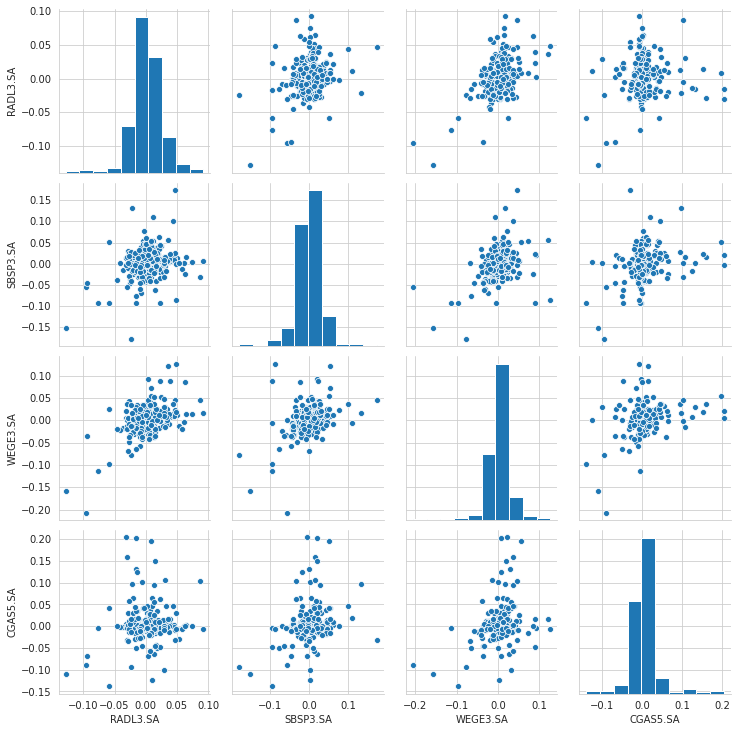

In [0]:
sns.pairplot(returns[:]);

In [0]:
covariancia = returns.cov()
covariancia

,RADL3.SA,SBSP3.SA,WEGE3.SA,CGAS5.SA
RADL3.SA,0.000577,0.000229,0.000380,0.000083
SBSP3.SA,0.000229,0.001087,0.000402,0.000343
WEGE3.SA,0.000380,0.000402,0.000901,0.000334
CGAS5.SA,0.000083,0.000343,0.000334,0.001336


## 8. SALVAR DADOS EM EXCEL E FAZER DOWNLOAD:

In [3]:
# TRANSFORMA O DATAFRAME EM UM ARQUIVO EXCEL E REALIZA O DOWNLOAD:
# matriz com os retornos médio dos ativos
retorno_medio_excel = retorno_medio.to_excel('retorno_medio.xlsx')
files.download('retorno_medio.xlsx')
# Matriz de covariância
covariancia = covariancia.to_excel('covariancia.xlsx')
files.download('covariancia.xlsx')
# Matriz de dados historicos dos preços
pf_data_excel = pf_data.to_excel('dados.xlsx')
files.download("dados.xlsx")


NameError: ignored